In [95]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [97]:
data=pd.read_csv('/content/Amazon Product Reviews Dataset.csv')
data

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [99]:
data.describe()

,ean,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sizes,upc
count,8.980000e+02,900.000000,1177.000000,0.0,0.0,0.0,8.980000e+02
mean,8.443135e+11,83.584444,4.359388,NaN,NaN,NaN,8.443135e+11
std,3.416444e+09,197.150238,1.021445,NaN,NaN,NaN,3.416444e+09
min,8.416670e+11,0.000000,1.000000,NaN,NaN,NaN,8.416670e+11
25%,8.416670e+11,0.000000,4.000000,NaN,NaN,NaN,8.416670e+11
50%,8.416670e+11,0.000000,5.000000,NaN,NaN,NaN,8.416670e+11
75%,8.487190e+11,34.000000,5.000000,NaN,NaN,NaN,8.487190e+11
max,8.487190e+11,997.000000,5.000000,NaN,NaN,NaN,8.487190e+11


Exploratory data analysis

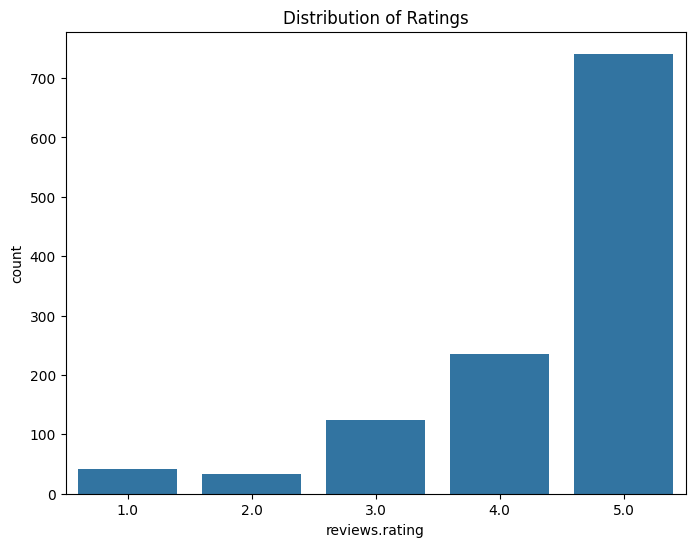

In [100]:
# Visualize the distribution of ratings
plt.figure(figsize=(8, 6))
# Use data_sample and correct column name ('ratings.overall')
sns.countplot(x='reviews.rating', data=data)
plt.title('Distribution of Ratings')
plt.show()


In [101]:
# Explore the most frequent words in positive and negative reviews (example)
from collections import Counter

positive_reviews = data[data['reviews.rating'] >= 4]['reviews.text'].astype(str)  # Use correct column name
negative_reviews = data[data['reviews.rating'] <= 2]['reviews.text'].astype(str)  # Use correct column name

positive_words = ' '.join(positive_reviews).lower().split()
negative_words = ' '.join(negative_reviews).lower().split()

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

print("Most common positive words:", positive_word_counts.most_common(10))
print("Most common negative words:", negative_word_counts.most_common(10))

Most common positive words: [('the', 7177), ('to', 3736), ('and', 3444), ('i', 3278), ('a', 3035), ('is', 2333), ('it', 2049), ('of', 1836), ('for', 1697), ('you', 1477)]
Most common negative words: [('the', 415), ('i', 239), ('it', 195), ('to', 194), ('a', 192), ('and', 169), ('of', 126), ('is', 113), ('for', 100), ('this', 86)]


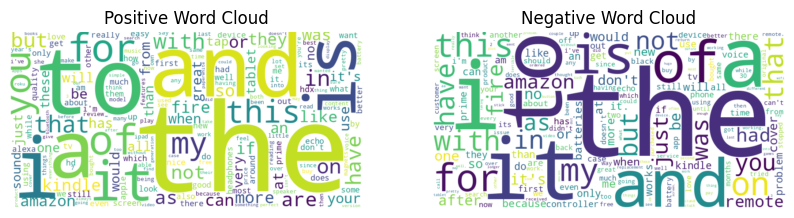

In [102]:
from wordcloud import WordCloud

# Create word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_counts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_counts)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Word Cloud')
plt.axis('off')

plt.show()

In [103]:
!pip install vaderSentiment

In [104]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [106]:
a=data['reviews.text'][3]
a

'I bought one of the first Paperwhites and have been very pleased with it its been a constant companion and I suppose Ive read, on average, a book every three days for the past however many years on it. I wouldnt give it up youd have to pry it from my cold dead fingers.For sundry logistical reasons, Ive also made good use of Amazons Kindle app on my iPhone. No Paperwhite screen, naturally, and all the cool usability that delivers, but it works well and has its own attractions as a companion to the Kindle.Of course, there are aspects of the Paperwhite which I would like to critique. Ah you knew that was coming somewhere, didnt you.As a member of BookBub, I get a daily list of alerts and book deals in my chosen genres. I take on many of them, however, Ive found that, even with the best will in the world, I cant keep up. Some days it seems that for every book I read, Ive bought two. Theres just so much good stuff out there! The accumulative effect of this is that the number of books actua

In [107]:
from nltk.tokenize import word_tokenize
import re
def clean_data (text):
    # clean from symbols
    cleaded =re.sub(r'[^\w\s]','',text)
    cleaned_text = cleaded.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Get the list of stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tokenized text
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    joined_string = ' '.join(filtered_tokens)
    return joined_string

In [108]:
clean_data(a)

'bought one first Paperwhites pleased constant companion suppose Ive read , average , book every three days past however many years . wouldnt give youd pry cold dead fingers.For sundry logistical reasons , Ive also made good use Amazons Kindle app iPhone . Paperwhite screen , naturally , cool usability delivers , works well attractions companion Kindle.Of course , aspects Paperwhite would like critique . Ah knew coming somewhere , didnt you.As member BookBub , get daily list alerts book deals chosen genres . take many , however , Ive found , even best world , cant keep . days seems every book read , Ive bought two . Theres much good stuff ! accumulative effect number books actually Paperwhite creeping ever upward time . 400.With mind , Ive noticed page-turning remained exactly , every action Kindle become positively glacial . slow , slow think malfunctioning . general consensus appears expected one many books downloaded onto Kindle , begin behave flakey manner . drives mad . Amazon sta

# Feature Engineering
checking null values

In [109]:
data.isnull().sum()

,0
id,0
asins,0
brand,0
categories,0
colors,823
dateAdded,0
dateUpdated,0
dimension,1032
ean,699
keys,0


In [110]:
data.dropna(subset=['reviews.date'],inplace=True)

In [111]:
data.isnull().sum()

,0
id,0
asins,0
brand,0
categories,0
colors,593
dateAdded,0
dateUpdated,0
dimension,664
ean,407
keys,0


In [112]:
data.drop(columns=['sizes','reviews.userProvince','reviews.userCity','dimension'],inplace=True)

In [113]:
data.isnull().sum()

,0
id,0
asins,0
brand,0
categories,0
colors,593
dateAdded,0
dateUpdated,0
ean,407
keys,0
manufacturer,374


In [114]:
data['manufacturerNumber'].fillna(data['manufacturerNumber'].mode()[0],inplace=True)

<ipython-input-114-8df3e882e7b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['manufacturerNumber'].fillna(data['manufacturerNumber'].mode()[0],inplace=True)


In [115]:
data.dropna(subset=['manufacturerNumber'],inplace=True)

In [116]:
data.isnull().sum()

,0
id,0
asins,0
brand,0
categories,0
colors,593
dateAdded,0
dateUpdated,0
ean,407
keys,0
manufacturer,374


In [117]:
data['manufacturer'].fillna(data['manufacturer'].mode()[0],inplace=True)
data.isnull().sum()

<ipython-input-117-91e8e4f2e66c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['manufacturer'].fillna(data['manufacturer'].mode()[0],inplace=True)


,0
id,0
asins,0
brand,0
categories,0
colors,593
dateAdded,0
dateUpdated,0
ean,407
keys,0
manufacturer,0


In [118]:
data['reviews.doRecommend'].fillna(data['reviews.doRecommend'].mode()[0],inplace=True)

<ipython-input-118-624dad6ae584>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews.doRecommend'].fillna(data['reviews.doRecommend'].mode()[0],inplace=True)
<ipython-input-118-624dad6ae584>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['reviews.doRecommend'].fillna(data['reviews.doRecommend'

In [119]:
data.isnull().sum()

,0
id,0
asins,0
brand,0
categories,0
colors,593
dateAdded,0
dateUpdated,0
ean,407
keys,0
manufacturer,0


<Axes: >

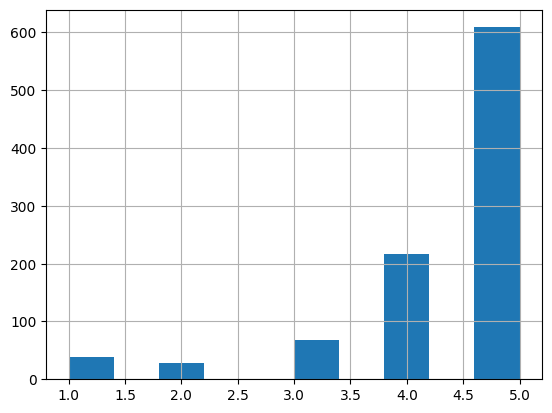

In [120]:
data['reviews.rating'].hist()

In [121]:
data['reviews.rating'].fillna(data['reviews.rating'].mode()[0],inplace=True)

<ipython-input-121-5ff10ad957af>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews.rating'].fillna(data['reviews.rating'].mode()[0],inplace=True)


In [122]:
data.isnull().sum()

,0
id,0
asins,0
brand,0
categories,0
colors,593
dateAdded,0
dateUpdated,0
ean,407
keys,0
manufacturer,0


In [123]:
data['asins'].unique()

array(['B00QJDU3KY', 'B002Y27P3M', 'B00DU15MU4', 'B01LW1MS9C',
       'B01FWSVGQQ', 'B00DOPNLJ0', 'B00NO8LX7E', 'B00LWHUAF0',
       'B00KDRQEYQ', 'B00OQVZDJM', 'B00QJDVBFU', 'B010BWYP20',
       'B01KIOU4EO', 'B0117U8JSG', 'B01A08ECQY', 'B01J2G4VBG',
       'B00QJDS7I4', 'B00U879XZ8', 'B010EK1GOE', 'B00LWHUB9A',
       'B00ZS0G0PG', 'B01A08E70K', 'B00PD81ETU', 'B06XDD27LJ',
       'B00CX5P8FC', 'B07194GPJV', 'B008GG93YE,B00LWHUBPO,B0051QYGXA',
       'B071NMTDHR', 'B0117U82EM', 'B0711C7WL2', 'B01M3ULMWP',
       'B00LWHU9D8', 'B0716JZKLT', 'B01BRWH8G8', 'B01M4NRFXX',
       'B01KVZDFD2', 'B01M4NU4OM', 'B008GGCAVM,B00DOPNMVM', 'B01M71HRMY',
       'B01K8B8YA8', 'B010BWYDYA', 'B01KIOU214', 'B00DOPNK14',
       'B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK',
       'B01BH83OOM', 'B00K5W9WZW', 'B01E9AHU8Q', 'B01HC1S9HU',
       'B00HX0SRXW', 'B00LORGAG6', 'B00NO8JJZW'], dtype=object)

In [124]:
data['manufacturerNumber'].unique()

array(['B01BH83OOM', 'D01101', '8.48719E+11', 'KA416Y', 'CV98LM',
       'DR49WK'], dtype=object)

<Axes: >

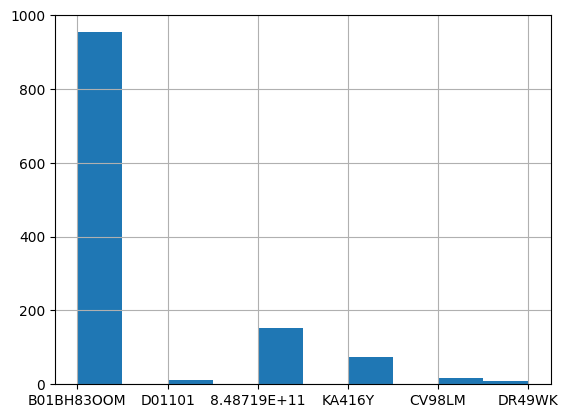

In [125]:
data['manufacturerNumber'].hist()

In [126]:
data['manufacturerNumber'].fillna(data['manufacturerNumber'].mode()[0],inplace=True)

<ipython-input-126-8df3e882e7b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['manufacturerNumber'].fillna(data['manufacturerNumber'].mode()[0],inplace=True)


In [127]:
data['reviews.numHelpful'].value_counts()

,count
reviews.numHelpful,
0.0,503
2.0,21
3.0,18
1.0,16
14.0,9
...,...
391.0,1
23.0,1
335.0,1


In [128]:
data['reviews.numHelpful'].fillna(data['reviews.numHelpful'].mode()[0],inplace=True)

<ipython-input-128-951db9d04046>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews.numHelpful'].fillna(data['reviews.numHelpful'].mode()[0],inplace=True)


In [129]:
data.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,ean,keys,manufacturer,...,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,2015-08-08T00:00:00.000Z,True,139.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,2015-09-01T00:00:00.000Z,True,126.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,2015-07-20T00:00:00.000Z,True,69.0,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,2017-06-16T00:00:00.000Z,True,2.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,NaN,kindlepaperwhite/b00qjdu3ky,Amazon,...,2016-08-11T00:00:00.000Z,True,17.0,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic,NaN,205 grams


In [130]:
data.drop(columns=['ean','keys','reviews.sourceURLs','upc','reviews.title','reviews.username','colors'],inplace=True)

label encoding

In [131]:
data['categories'].unique()

array(['Amazon Devices,mazon.co.uk',
       'Kindle Store,Amazon Devices,Electronics',
       'Categories,Amazon Devices,Streaming Media Players',
       'Amazon Devices',
       'Categories,Amazon Devices,Electronics Features,Streaming Media Players,Consumer Electronics,See more Amazon Fire TV Digital HD Media Streamer (Late...',
       'Amazon Devices & Accessories,Amazon Device Accessories,Power Adapters & Cables,Kindle Store,Kindle E-Reader Accessories,Kindle Paperwhite Accessories',
       'Amazon Devices,Kindle Store', 'Electronics,Amazon Devices',
       'Amazon Devices,Kindle Accessories',
       'Amazon Devices,Electronics,Kindle Store',
       'Amazon Devices,Electronics,Kindle Store,Amazon Echo',
       'Amazon Devices,Kindle Store,Kindle Accessories',
       'Amazon Devices,Kindle Store,buy a kindle',
       'Amazon Devices,Home,Smart Home & Connected Living,Smart Hubs & Wireless Routers,Smart Hubs,Home Improvement,Home Safety & Security,Alarms & Sensors,Home Security,Amazo

In [132]:
data['asins'].unique()

array(['B00QJDU3KY', 'B002Y27P3M', 'B00DU15MU4', 'B01LW1MS9C',
       'B01FWSVGQQ', 'B00DOPNLJ0', 'B00NO8LX7E', 'B00LWHUAF0',
       'B00KDRQEYQ', 'B00OQVZDJM', 'B00QJDVBFU', 'B010BWYP20',
       'B01KIOU4EO', 'B0117U8JSG', 'B01A08ECQY', 'B01J2G4VBG',
       'B00QJDS7I4', 'B00U879XZ8', 'B010EK1GOE', 'B00LWHUB9A',
       'B00ZS0G0PG', 'B01A08E70K', 'B00PD81ETU', 'B06XDD27LJ',
       'B00CX5P8FC', 'B07194GPJV', 'B008GG93YE,B00LWHUBPO,B0051QYGXA',
       'B071NMTDHR', 'B0117U82EM', 'B0711C7WL2', 'B01M3ULMWP',
       'B00LWHU9D8', 'B0716JZKLT', 'B01BRWH8G8', 'B01M4NRFXX',
       'B01KVZDFD2', 'B01M4NU4OM', 'B008GGCAVM,B00DOPNMVM', 'B01M71HRMY',
       'B01K8B8YA8', 'B010BWYDYA', 'B01KIOU214', 'B00DOPNK14',
       'B00DOPNO4M,B00BWYQ9YE,B00CYQPMJC,B00CUU1CGY,B00BWYRF7E,B00CYQP3AK',
       'B01BH83OOM', 'B00K5W9WZW', 'B01E9AHU8Q', 'B01HC1S9HU',
       'B00HX0SRXW', 'B00LORGAG6', 'B00NO8JJZW'], dtype=object)

In [133]:
data['manufacturer'].unique()

array(['Amazon', 'AMDSI'], dtype=object)

In [134]:
data['brand'].unique()

array(['Amazon', 'Moshi'], dtype=object)

In [135]:
data['name'].unique()

array(['Kindle Paperwhite', 'Kindle Keyboard',
       'Certified Refurbished Amazon Fire TV (Previous Generation - 1st)',
       'Amazon Echo Dot Case (fits Echo Dot 2nd Generation only) - Indigo Fabric',
       'Amazon Tap Sling Cover - Tangerine', 'Kindle Fire HDX 8.9"',
       'Amazon Echo Dot Case (fits Echo Dot 2nd Generation only) - Saddle Tan Leather',
       'Amazon Tap Sling Cover - Blue',
       'Amazon Echo Dot Case (fits Echo Dot 2nd Generation only) - Sandstone Fabric',
       'All-New Amazon Fire TV Game Controller', 'Fire HD 7 Tablet',
       'Amazon Fire TV Game Controller', 'Amazon Tap Sling Cover - White',
       'Amazon Tap Sling Cover - Magenta',
       'Certified Refurbished Kindle E-reader',
       'Amazon Tap Sling Cover - Green',
       'Kindle Paperwhite E-reader - Black', 'Kindle Paperwhite 3G',
       'Amazon Echo Dot Case (fits Echo Dot 2nd Generation only) - Merlot Leather',
       'Fire Kids Edition Tablet', 'Echo Show - Black',
       'Certified Refurbish

In [136]:
data['manufacturerNumber'].unique()

array(['B01BH83OOM', 'D01101', '8.48719E+11', 'KA416Y', 'CV98LM',
       'DR49WK'], dtype=object)

In [137]:
data['weight'].unique()

array(['205 grams', '1.1 pounds', nan, '1.6 ounces', '1.75 lbs',
       '0.8 ounces', '4 ounces', '5 ounces', '4.6 ounces', '2.4 ounces'],
      dtype=object)

In [138]:
data['weight'].isnull().sum()

np.int64(583)

<Axes: >

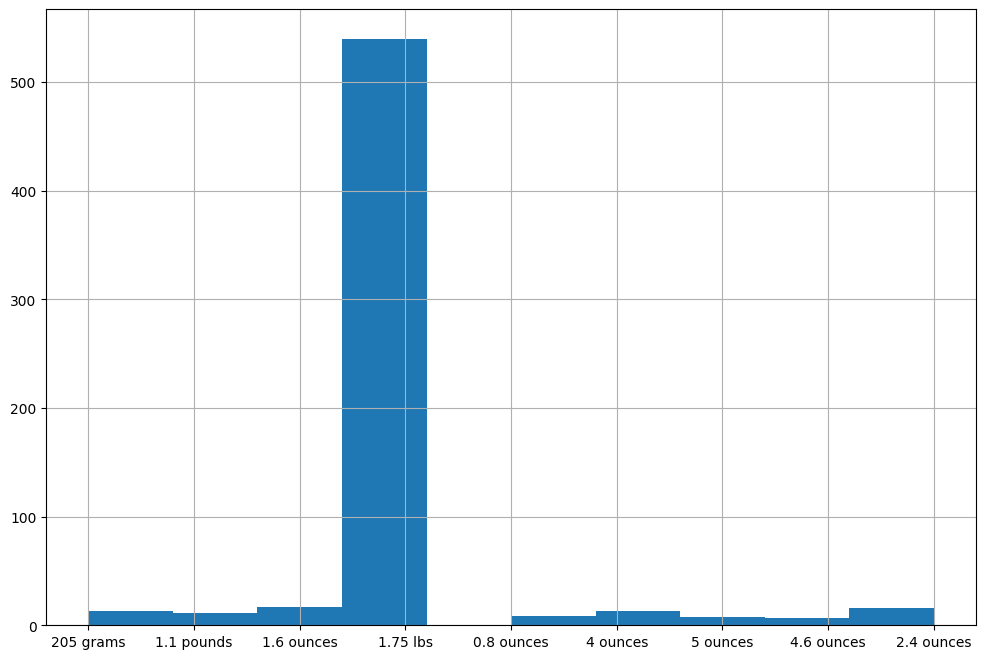

In [139]:
data['weight'].hist(figsize=(12,8))

In [140]:
data['weight'].fillna(data['weight'].mode()[0],inplace=True)

<ipython-input-140-cadc0c25dc6b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['weight'].fillna(data['weight'].mode()[0],inplace=True)


In [141]:
#take sample of 1000 rows

#data_sample = data.sample(n=1000, random_state=42) # Set random_state for reproducibility
#data_sample


In [142]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
encoder_hot=OneHotEncoder()
encoder_label=LabelEncoder()

In [143]:
data['reviews.doRecommend']=encoder_label.fit_transform(data['reviews.doRecommend'])
data['manufacturer']=encoder_label.fit_transform(data['manufacturer'])
data['brand']=encoder_label.fit_transform(data['brand'])
data.head()

,id,asins,brand,categories,dateAdded,dateUpdated,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,0,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,1,B01BH83OOM,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,1,139.0,5.0,I initially had trouble deciding between the p...,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,0,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,1,B01BH83OOM,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,1,126.0,5.0,Allow me to preface this with a little history...,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,0,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,1,B01BH83OOM,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,1,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,0,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,1,B01BH83OOM,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,1,2.0,5.0,I bought one of the first Paperwhites and have...,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,0,"Amazon Devices,mazon.co.uk",2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,1,B01BH83OOM,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,1,17.0,5.0,I have to say upfront - I don't like coroporat...,205 grams


In [144]:
data['reviews.text'][0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [145]:
#text
def clean_data(text):
    # Convert to string if not already to handle potential float values
    if not isinstance(text, str):
        text = str(text)
    # clean from symbols
    cleaded = re.sub(r'[^\w\s]', '', text)
    cleaned_text = cleaded.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Get the list of stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords from the tokenized text
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    joined_string = ' '.join(filtered_tokens)
    return joined_string

In [146]:
data['reviews.text'][0]

"I initially had trouble deciding between the paperwhite and the voyage because reviews more or less said the same thing: the paperwhite is great, but if you have spending money, go for the voyage.Fortunately, I had friends who owned each, so I ended up buying the paperwhite on this basis: both models now have 300 ppi, so the 80 dollar jump turns out pricey the voyage's page press isn't always sensitive, and if you are fine with a specific setting, you don't need auto light adjustment).It's been a week and I am loving my paperwhite, no regrets! The touch screen is receptive and easy to use, and I keep the light at a specific setting regardless of the time of day. (In any case, it's not hard to change the setting either, as you'll only be changing the light level at a certain time of day, not every now and then while reading).Also glad that I went for the international shipping option with Amazon. Extra expense, but delivery was on time, with tracking, and I didnt need to worry about cu

In [147]:
data['prices'][0]

'[{"amountMax":139.99,"amountMin":139.99,"currency":"USD","dateAdded":"2017-07-18T23:52:58Z","dateSeen":["2017-07-15T18:10:23.807Z","2016-03-16T00:00:00Z"],"isSale":"false","merchant":"Amazon.com","shipping":"FREE Shipping.","sourceURLs":["https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669702011_1_7/132-1677641-8459202?s=amazon-devices&ie=UTF8&qid=1498832761&sr=1-7","http://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built-/dp/B00QJDU3KY"]},{"amountMax":119.99,"amountMin":119.99,"condition":"new","currency":"EUR","dateAdded":"2016-03-08T20:21:53Z","dateSeen":["2016-01-29T00:00:00Z"],"isSale":"false","merchant":"Amazon EU Sarl","shipping":"free","sourceURLs":["http://www.amazon.co.uk/Kindle-Paperwhite-Resolution-Display-Built-/dp/B00QJDU3KY"]},{"amountMax":139.99,"amountMin":139.99,"condition":"new","currency":"CAD","dateAdded":"2016-03-08T20:21:53Z","dateSeen":["2016-01-11T00:00:00Z"],"isSale":"false","merchant":"Amazon","shipp

In [148]:
data.drop('prices',inplace=True,axis=1)

In [149]:
# handling date
from datetime import datetime
import pandas as pd

list_date=['reviews.date','dateAdded','dateUpdated']
for i in list_date :
    # Use the infer_datetime_format and errors parameters to handle variations
    data[i] = pd.to_datetime(data[i], infer_datetime_format=True, errors='coerce')
    data['year'+i] = data[i].dt.year
    data['month'+i] = data[i].dt.month
    data['day'+i] = data[i].dt.day
    data.drop(i,axis=1,inplace=True)
data.head(2)

<ipython-input-149-15faab0fb0d4>:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[i] = pd.to_datetime(data[i], infer_datetime_format=True, errors='coerce')
<ipython-input-149-15faab0fb0d4>:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data[i] = pd.to_datetime(data[i], infer_datetime_format=True, errors='coerce')
<ipython-input-149-15faab0fb0d4>:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-d

,id,asins,brand,categories,manufacturer,manufacturerNumber,name,reviews.doRecommend,reviews.numHelpful,reviews.rating,...,weight,yearreviews.date,monthreviews.date,dayreviews.date,yeardateAdded,monthdateAdded,daydateAdded,yeardateUpdated,monthdateUpdated,daydateUpdated
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,0,"Amazon Devices,mazon.co.uk",1,B01BH83OOM,Kindle Paperwhite,1,139.0,5.0,...,205 grams,2015.0,8.0,8.0,2016,3,8,2017,7,18
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,0,"Amazon Devices,mazon.co.uk",1,B01BH83OOM,Kindle Paperwhite,1,126.0,5.0,...,205 grams,2015.0,9.0,1.0,2016,3,8,2017,7,18


In [150]:
data=pd.get_dummies(data,columns = ['manufacturerNumber','id','weight', 'name','asins','categories'])

In [151]:
data.isnull().sum().sum()

np.int64(1101)

In [152]:
data.head()

,brand,manufacturer,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,yearreviews.date,monthreviews.date,dayreviews.date,yeardateAdded,...,"categories_Amazon Devices,Kindle Accessories","categories_Amazon Devices,Kindle Store","categories_Amazon Devices,Kindle Store,Kindle Accessories","categories_Amazon Devices,Kindle Store,buy a kindle","categories_Amazon Devices,mazon.co.uk","categories_Categories,Amazon Devices,Electronics Features,Streaming Media Players,Consumer Electronics,See more Amazon Fire TV Digital HD Media Streamer (Late...","categories_Categories,Amazon Devices,Streaming Media Players","categories_Cell Phones & Accessories,Accessories,Screen Protectors,Cell,Amazon Devices,Electronics","categories_Electronics,Amazon Devices","categories_Kindle Store,Amazon Devices,Electronics"
0,0,1,1,139.0,5.0,I initially had trouble deciding between the p...,2015.0,8.0,8.0,2016,...,False,False,False,False,True,False,False,False,False,False
1,0,1,1,126.0,5.0,Allow me to preface this with a little history...,2015.0,9.0,1.0,2016,...,False,False,False,False,True,False,False,False,False,False
2,0,1,1,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,2015.0,7.0,20.0,2016,...,False,False,False,False,True,False,False,False,False,False
3,0,1,1,2.0,5.0,I bought one of the first Paperwhites and have...,2017.0,6.0,16.0,2016,...,False,False,False,False,True,False,False,False,False,False
4,0,1,1,17.0,5.0,I have to say upfront - I don't like coroporat...,2016.0,8.0,11.0,2016,...,False,False,False,False,True,False,False,False,False,False


In [153]:
data.shape

(1217, 224)

# Split Data

In [154]:
X=data[['reviews.text']]
y=data['reviews.rating']
X.shape

(1217, 1)

In [155]:
#  splitting the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [156]:
X_train.shape

(851, 1)

In [157]:
X_test.shape

(366, 1)

create models

In [158]:
from imblearn.over_sampling import SMOTE
# Before splitting the data
imputer = SimpleImputer(strategy='most_frequent')  # Create an imputer object
# Fit and transform to fill NaN values only in the 'reviews.text' column
data['reviews.text'] = imputer.fit_transform(data[['reviews.text']]).ravel()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 4))

# Splitting the data
X = vectorizer.fit_transform(data['reviews.text'].fillna(''))
y = data['reviews.rating']
#handling class implance
smote = SMOTE(random_state=42)
X_resanpled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resanpled, y_resampled, test_size=0.2, random_state=42)

# Now use the vectorized data for training
model_naive = MultinomialNB(alpha=0.1)
model_naive.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [159]:
y_pred_naive = model_naive.predict(X_test)

In [160]:
acc_naive=accuracy_score(y_test,y_pred_naive)
acc_naive

0.851039260969977

In [161]:
# SVC
model_SVC = SVC(C=1.0, kernel='linear', class_weight='balanced', probability=True)
model_SVC.fit(X_train, y_train)
y_pred_SVC = model_SVC.predict(X_test)  # Predict using vectorized test data
acc_SVC = accuracy_score(y_test, y_pred_SVC)
print(acc_SVC)

0.9445727482678984


In [162]:
model_NN = MLPClassifier(hidden_layer_sizes=(200, 100), learning_rate='adaptive', max_iter=1000, early_stopping=True, random_state=42)
model_NN.fit(X_train, y_train)
y_pred_NN = model_NN.predict(X_test)  # Predict using vectorized test data
acc_NN = accuracy_score(y_test, y_pred_NN)
print(acc_NN)

0.9526558891454965


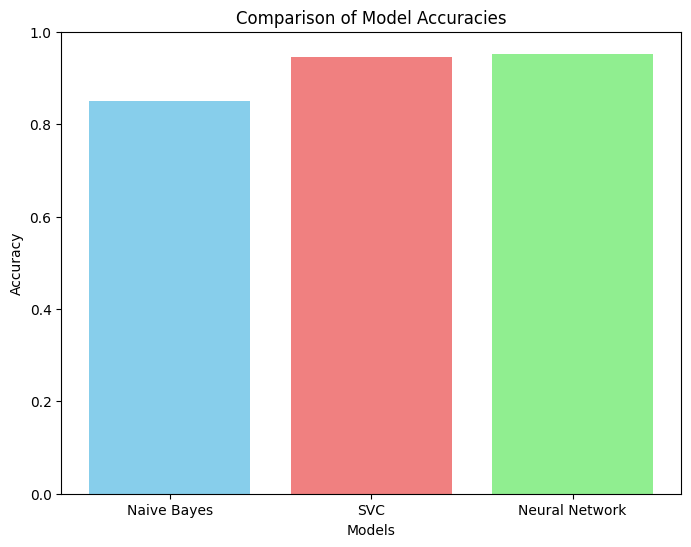

In [163]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy scores in variables: acc_naive, acc_SVC, acc_NN
model_names = ['Naive Bayes', 'SVC', 'Neural Network']
accuracies = [acc_naive, acc_SVC, acc_NN]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


In [164]:

# New review text
new_review = "This product is amazing! I highly recommend it."

# Preprocess the new review (apply the same cleaning function as before)
cleaned_review = clean_data(new_review) # Assuming you have a clean_data function

# Vectorize the new review using the fitted vectorizer
new_review_vec = vectorizer.transform([cleaned_review])

# Predict using each model
predicted_rating_naive = model_naive.predict(new_review_vec)[0]
predicted_rating_svc = model_SVC.predict(new_review_vec)[0]
predicted_rating_nn = model_NN.predict(new_review_vec)[0]

# Print the predicted ratings
print(f"Predicted rating (Naive Bayes): {predicted_rating_naive}")
print(f"Predicted rating (SVC): {predicted_rating_svc}")
print(f"Predicted rating (Neural Network): {predicted_rating_nn}")

Predicted rating (Naive Bayes): 5.0
Predicted rating (SVC): 5.0
Predicted rating (Neural Network): 5.0


In [165]:
import joblib
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(model_naive, 'model_naive.pkl')
joblib.dump(model_SVC, 'model_SVC.pkl')
joblib.dump(model_NN, 'model_NN.pkl')

['model_NN.pkl']

In [166]:
!streamlit run app.py &>/dev/null&

In [167]:
!pip install streamlit
!npm install -g pyngrok


⠙⠹⠸⠼⠴⠦npm error code E404
⠦npm error 404 Not Found - GET https://registry.npmjs.org/pyngrok - Not found
⠦npm error 404
⠦npm error 404  'pyngrok@*' is not in this registry.
⠦npm error 404
⠦npm error 404 Note that you can also install from a
⠦npm error 404 tarball, folder, http url, or git url.
⠦npm error A complete log of this run can be found in: /root/.npm/_logs/2025-05-12T13_00_40_222Z-debug-0.log
⠦

In [168]:
%%writefile app.py
import streamlit as st
import joblib
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re



# Download NLTK data
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')

# Define clean_data function
def clean_data(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# Load models and vectorizer
try:
    vectorizer = joblib.load('/content/vectorizer.pkl')
    model_naive = joblib.load('/content/model_naive.pkl')
    model_SVC = joblib.load('/content/model_SVC.pkl')
    model_NN = joblib.load('/content/model_NN.pkl')
except FileNotFoundError:
    st.error("Model or vectorizer files not found. Please ensure they are saved as .pkl files.")
    st.stop()

# Streamlit app
st.set_page_config(page_title="Amazon Review Rating Predictor", page_icon="⭐")

# Custom CSS for styling
st.markdown(
    """
    <style>
    .main {background-color: #f5f5f5;}
    .stButton>button {background-color: #ff9900; color: white; border-radius: 5px;}
    .stTextInput {background-color: #ffffff;}
    .prediction-box {background-color: #e6f3ff; padding: 10px; border-radius: 5px; margin-top: 10px;}
    </style>
    """,
    unsafe_allow_html=True
)

# Title and description
st.title("⭐ Amazon Review Rating Predictor")
st.markdown("""
This app predicts the star rating (1 to 5) of an Amazon product review using machine learning.
Enter a review below, and our models (Naive Bayes, SVC, and Neural Network) will predict the rating.
""")

# Input review
review = st.text_area("Enter your review:", placeholder="e.g., This product is amazing! I highly recommend it.", height=100)

# Predict button
if st.button("Predict Rating"):
    if review.strip():
        # Preprocess and vectorize
        cleaned_review = clean_data(review)
        review_vec = vectorizer.transform([cleaned_review])

        # Predict
        try:
            pred_naive = model_naive.predict(review_vec)[0]
            pred_svc = model_SVC.predict(review_vec)[0]
            pred_nn = model_NN.predict(review_vec)[0]

            # Display results
            st.markdown("### Predictions")
            st.markdown(
                f"""
                <div class="prediction-box">
                <b>Naive Bayes:</b> {pred_naive:.1f} ⭐<br>
                <b>SVC:</b> {pred_svc:.1f} ⭐<br>
                <b>Neural Network:</b> {pred_nn:.1f} ⭐
                </div>
                """,
                unsafe_allow_html=True
            )
        except Exception as e:
            st.error(f"Error during prediction: {e}")
    else:
        st.warning("Please enter a review.")

# Footer
st.markdown("---")
st.markdown("Models trained on Amazon Product Reviews Dataset")




Overwriting app.py


In [169]:
!pip install pyngrok
from pyngrok import ngrok
import threading
import os
import time

# Set your authtoken
ngrok.set_auth_token("2wlsNsVOpOUMdEVk9Y5aLX3eKK5_5vSJaZaMaMRxzRiRfnfSQ") # Replace with your actual authtoken

# Start the Streamlit server in a background thread
def run():
    os.system("streamlit run app.py")

thread = threading.Thread(target=run)
thread.start()

# Wait for Streamlit to start
time.sleep(5)

# First, get the current tunnels (if any) to disconnect
try:
    tunnels = ngrok.get_tunnels()
    for tunnel in tunnels:
        # Disconnect existing tunnels
        ngrok.disconnect(tunnel.public_url)
except Exception as e:
    print(f"Error getting or disconnecting tunnels: {e}")

# Now open a new tunnel to the correct HTTP URL
try:
    public_url = ngrok.connect(addr="8501", proto="http")
    print("Streamlit is live at:", public_url)
except Exception as e:
    print(f"Error connecting with ngrok: {e}")

Streamlit is live at: NgrokTunnel: "https://69f0-34-86-182-214.ngrok-free.app" -> "http://localhost:8501"
